<a href="https://colab.research.google.com/github/BrockH3/Intro_to_ml/blob/main/Homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [194]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from google.colab import drive
drive.mount('/content/drive')

filepath='/content/drive/My Drive/Intro to ML/datasets/cancer.csv'
cancer = pd.DataFrame(pd.read_csv(filepath))

#drop id column and set M and B to 1 and 0
cancer = cancer.drop(columns = ['id','Unnamed: 32'])

def binary_map(x):
    return x.map({'M': 1, 'B': 0,})

cancer[['diagnosis']] = cancer[['diagnosis']].apply(binary_map)

cancer.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [195]:
#1 SVM classifier with PCA feature extraction
y = cancer.pop('diagnosis')
x = cancer

#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)
principalDf.head()

,0,1,2
0,1160.142574,-293.917544,48.578398
1,1269.122443,15.630182,-35.394534
2,995.793889,39.156743,-1.709753
3,-407.180803,-67.380320,8.672848
4,930.341180,189.340742,1.374801


In [196]:
#scale
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
principalDF_scale = sc_X.fit_transform(principalDf)

#add target back to set
DF_final = pd.concat([pd.DataFrame(principalDF_scale), y], axis=1)
DF_final.head()

,0,1,2,diagnosis
0,1.743043,-3.440692,1.832695,1
1,1.906779,0.182972,-1.335313,1
2,1.496120,0.458381,-0.064503,1
3,-0.611764,-0.788775,0.327197,1
4,1.397781,2.216483,0.051866,1


In [197]:
#random split for train and test sets
from sklearn.model_selection import train_test_split
np.random.seed(0)
train, val = train_test_split(DF_final, train_size = .8, test_size = .2, random_state = 100)

y_train = train.pop('diagnosis')
x_train = train

y_val = val.pop('diagnosis')
x_val = val

#SVM
from sklearn.svm import SVC
model = SVC(kernel = 'linear', C=1E3)
model.fit(x_train, y_train)
y_pred = model.predict(x_val)

In [198]:
#display accuracy, precision, and recall
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))
print("Precision:",metrics.precision_score(y_val, y_pred))
print("Recall:",metrics.recall_score(y_val, y_pred))
print("F1:",metrics.f1_score(y_val, y_pred))

Accuracy: 0.956140350877193
Precision: 0.94
Recall: 0.9591836734693877
F1: 0.9494949494949495


In [276]:
#2 SVR regression model
filepath2='/content/drive/My Drive/Intro to ML/datasets/Housing.csv'
housing=pd.DataFrame(pd.read_csv(filepath2))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [277]:
#change string to numerical values
variables =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

#defining map function to change yes to 1 and no to 0
def binary_map(x):
    return x.map({'yes': 1, 'no': 0,})

housing[variables] = housing[variables].apply(binary_map)
housing = housing.drop(columns = 'furnishingstatus')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [278]:
y = housing.pop('price')
x = housing
print(y)

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64


In [279]:
#pca
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(x)
X = pd.DataFrame(data = principalComponents)

X = sc_X.fit_transform(X)
X = pd.DataFrame(X)
DF_final = pd.concat([pd.DataFrame(X), y], axis=1)
X.head()

,0,1,2,3,4,5
0,1.046726,1.786535,0.909942,-0.167279,0.018901,-0.114139
1,1.757010,3.055855,1.662809,-0.806051,-0.074788,4.452805
2,2.218232,0.031374,0.817642,0.188186,0.733563,0.540807
3,1.083624,1.121835,2.478766,0.958371,0.816479,-0.129174
4,1.046726,0.725007,1.224557,1.018835,0.678838,-1.255327


In [280]:
np.random.seed(0)
train, val = train_test_split(DF_final, train_size = .8, test_size = .2, random_state = 100)

y_train = train.pop('price')
x_train = train

y_val = val.pop('price')
x_val = val

In [281]:
#svr linear model
from sklearn.svm import SVR
svr_linear = SVR(kernel='linear', C=1e3)
y_linear = svr_linear.fit(x_train, y_train).predict(x_val)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('error: ', mean_squared_error(y_val, y_linear, squared = False))

error:  1672910.6417104607


In [282]:
#svr rbf model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
y_rbf = svr_rbf.fit(x_train,y_train).predict(x_val)

print('error: ', mean_squared_error(y_val, y_rbf, squared = False))

error:  1886113.0419710085


In [283]:
#svr polynomial model
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_poly = svr_poly.fit(x_train,y_train).predict(x_val)

print('error: ', mean_squared_error(y_val, y_poly, squared = False))

error:  1897431.0400275786


ValueError: ignored

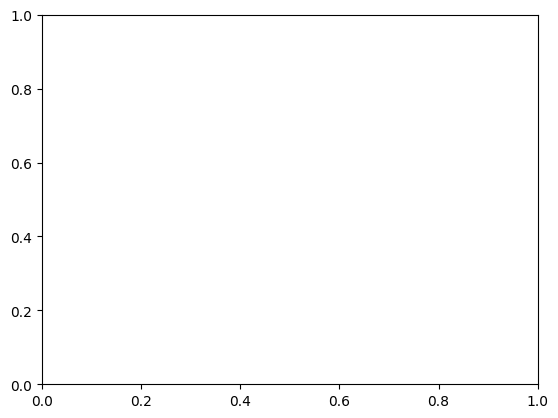

In [284]:
plt.scatter(X,y,color = 'orange', label = 'data')
plt.scatter(X,y,color = 'orange', label = 'data')
plt.plot(x_val,y_linear, color = 'black', label = 'linear')
plt.plot(x_val,y_rbf, color = 'blue', label = 'rbf')
plt.plot(x_val,y_poly, color = 'red', label = 'polynomial')
plt.legend()